# Project 3: Web APIs & Classification

**Part 2 Data Cleaning and Exploratory Data Analysis**

Imports 

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

Read in Dataset

In [2]:
#import data
# r/TheOnion 
onion = pd.read_csv('./onion.csv')

# r/nottheonion 
not_onion = pd.read_csv('./not_onion.csv')

In [3]:
# first 5 rows onion
print(onion.shape)
onion.head()

(2497, 8)


,Unnamed: 0,subreddit,author,domain,title,num_comments,score,timestamp
0,0,TheOnion,mothershipq,theonion.com,Surgeon Kind Of Pissed Patient Seeing Her Defo...,0,1,1640973300
1,1,TheOnion,-ImYourHuckleberry-,theartnewspaper.com,McDonald’s blocked from building drive-through...,1,1,1640971771
2,2,TheOnion,dwaxe,theonion.com,Gwyneth Paltrow Touts New Diamond-Encrusted Tr...,0,1,1640955671
3,3,TheOnion,dwaxe,theonion.com,Artist Crafting Music Box Hopes It Delights At...,0,1,1640955669
4,4,TheOnion,dwaxe,theonion.com,Homeowner Trying To Smoke Out Snakes Accidenta...,0,1,1640955668


In [4]:
# first 5 rows not_onion
print(not_onion.shape)
not_onion.head()

(2497, 8)


,Unnamed: 0,subreddit,author,domain,title,num_comments,score,timestamp
0,0,nottheonion,Taco_duck68,wral.com,"Man attempts to pay for car with rap, steals p...",0,1,1640995192
1,1,nottheonion,BlackNingaa,bloodyelbow.com,Former UFC fighter reveals past as sex worker ...,1,1,1640994707
2,2,nottheonion,Lopsided_File_1642,facebook.com,Log into Facebook,1,1,1640991506
3,3,nottheonion,SkinnyWhiteGirl19,theartnewspaper.com,McDonald’s blocked from building drive-through...,0,1,1640990429
4,4,nottheonion,kids-cake-and-crazy,kjrh.com,Legendary actress Betty White dies at 99 on Ne...,0,1,1640989181


Change Timestamp format

In [5]:
# Convert Timestamp to Datetime
onion['timestamp'] = pd.to_datetime(onion['timestamp'], unit='s')
not_onion['timestamp'] = pd.to_datetime(not_onion['timestamp'], unit='s')

In [6]:
# date-range of scraped data from both subreddits
print("theonion start:", onion['timestamp'].min())
print("theonion end:", onion['timestamp'].max())
print("nottheonion start:", not_onion['timestamp'].min())
print("nottheonion end:", not_onion['timestamp'].max())

theonion start: 2020-03-25 21:26:19
theonion end: 2021-12-31 17:55:00
nottheonion start: 2021-12-15 17:40:36
nottheonion end: 2021-12-31 23:59:52


In [7]:
# check head onion
print(onion.shape)
onion.head()

(2497, 8)


,Unnamed: 0,subreddit,author,domain,title,num_comments,score,timestamp
0,0,TheOnion,mothershipq,theonion.com,Surgeon Kind Of Pissed Patient Seeing Her Defo...,0,1,2021-12-31 17:55:00
1,1,TheOnion,-ImYourHuckleberry-,theartnewspaper.com,McDonald’s blocked from building drive-through...,1,1,2021-12-31 17:29:31
2,2,TheOnion,dwaxe,theonion.com,Gwyneth Paltrow Touts New Diamond-Encrusted Tr...,0,1,2021-12-31 13:01:11
3,3,TheOnion,dwaxe,theonion.com,Artist Crafting Music Box Hopes It Delights At...,0,1,2021-12-31 13:01:09
4,4,TheOnion,dwaxe,theonion.com,Homeowner Trying To Smoke Out Snakes Accidenta...,0,1,2021-12-31 13:01:08


In [8]:
#check head not_onion
print(not_onion.shape)
not_onion.head()

(2497, 8)


,Unnamed: 0,subreddit,author,domain,title,num_comments,score,timestamp
0,0,nottheonion,Taco_duck68,wral.com,"Man attempts to pay for car with rap, steals p...",0,1,2021-12-31 23:59:52
1,1,nottheonion,BlackNingaa,bloodyelbow.com,Former UFC fighter reveals past as sex worker ...,1,1,2021-12-31 23:51:47
2,2,nottheonion,Lopsided_File_1642,facebook.com,Log into Facebook,1,1,2021-12-31 22:58:26
3,3,nottheonion,SkinnyWhiteGirl19,theartnewspaper.com,McDonald’s blocked from building drive-through...,0,1,2021-12-31 22:40:29
4,4,nottheonion,kids-cake-and-crazy,kjrh.com,Legendary actress Betty White dies at 99 on Ne...,0,1,2021-12-31 22:19:41


In [9]:
onion.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    2497 non-null   int64         
 1   subreddit     2497 non-null   object        
 2   author        2497 non-null   object        
 3   domain        2497 non-null   object        
 4   title         2497 non-null   object        
 5   num_comments  2497 non-null   int64         
 6   score         2497 non-null   int64         
 7   timestamp     2497 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 156.2+ KB


In [10]:
not_onion.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    2497 non-null   int64         
 1   subreddit     2497 non-null   object        
 2   author        2497 non-null   object        
 3   domain        2497 non-null   object        
 4   title         2497 non-null   object        
 5   num_comments  2497 non-null   int64         
 6   score         2497 non-null   int64         
 7   timestamp     2497 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 156.2+ KB


# Clean Data #

Remove duplicates 

In [11]:
# Remove all Duplicate Rows
print("Original Number of posts in onion: ", len(onion))
print("Original Number of post in notonion: ", len(not_onion))
print('')

onion.drop_duplicates(subset = 'title', inplace = True)
not_onion.drop_duplicates(subset = 'title', inplace = True)

print("Number of posts onion after drop duplicates: ", len(onion))
print("Number of posts notonion after drop duplicates: ", len(not_onion))

Original Number of posts in onion:  2497
Original Number of post in notonion:  2497

Number of posts onion after drop duplicates:  2324
Number of posts notonion after drop duplicates:  1920


After drop, onion= 2324 and not onion= 1920.

In [12]:
# Check for null in columns onion
onion.isnull().sum()

Unnamed: 0      0
subreddit       0
author          0
domain          0
title           0
num_comments    0
score           0
timestamp       0
dtype: int64

In [13]:
#check for null in not onion
not_onion.isnull().sum()

Unnamed: 0      0
subreddit       0
author          0
domain          0
title           0
num_comments    0
score           0
timestamp       0
dtype: int64

In [14]:
onion.groupby('subreddit').describe()

Unnamed: 0                                                         \
               count         mean         std  min     25%     50%      75%   
subreddit                                                                     
TheOnion      2324.0  1234.011618  721.899194  0.0  604.75  1227.5  1863.25   

                  num_comments            ...               score             \
              max        count      mean  ...  75%    max   count       mean   
subreddit                                 ...                                  
TheOnion   2496.0       2324.0  5.835628  ...  6.0  421.0  2324.0  23.212134   

                                                   
                  std  min  25%  50%  75%     max  
subreddit                                          
TheOnion   153.730943  0.0  1.0  1.0  1.0  3732.0  

[1 rows x 24 columns]

In [15]:
not_onion.groupby('subreddit').describe()

Unnamed: 0                                                        \
                 count         mean         std  min     25%     50%     75%   
subreddit                                                                      
nottheonion     1920.0  1200.104687  706.701818  0.0  615.75  1185.5  1748.5   

                    num_comments            ...             score            \
                max        count      mean  ...  75%  max   count      mean   
subreddit                                   ...                               
nottheonion  2496.0       1920.0  0.390104  ...  1.0  2.0  1920.0  1.004687   

                                                
                  std  min  25%  50%  75%  max  
subreddit                                       
nottheonion  0.068322  1.0  1.0  1.0  1.0  2.0  

[1 rows x 24 columns]

# Exploratory Data Analysis (EDA)

Bar Plot Function

In [16]:
def bar_plot(x, y, title, color):    
    
    #Making barplot 
    plt.figure(figsize=(9,5))
    g=sns.barplot(x, y, color = color)    
    ax=g

    # Label graph
    plt.title(title, fontsize = 14)
    plt.xticks(fontsize = 11)

    # create a list to collect the plt.patches data
    totals = []

    # find values and append to list
    for p in ax.patches:
        totals.append(p.get_width())

    # set individual total bar 
    total = sum(totals)

    # set individual bar lables using above list
    for p in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(p.get_width()+.3, p.get_y()+.38, \
                int(p.get_width()), fontsize=12)

**r/TheOnion:** Bar plot- Most Active Authors

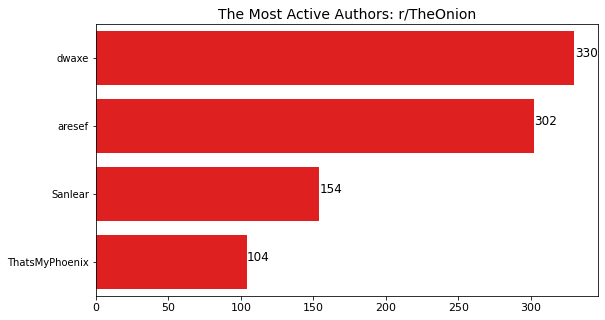

In [17]:
# Set x values: # of posts 
onion_a = onion['author'].value_counts() 
onion_a = onion_a[onion_a > 100].sort_values(ascending=False)

# Set y values to Authors 
onion_a_index = list(onion_a.index)

# call the function
bar_plot(onion_a.values, onion_a_index, 'The Most Active Authors: r/TheOnion', 'r') 

4 authors has more than 100 posts counts

**r/nottheonion:** Bar plot- Most Active Authors

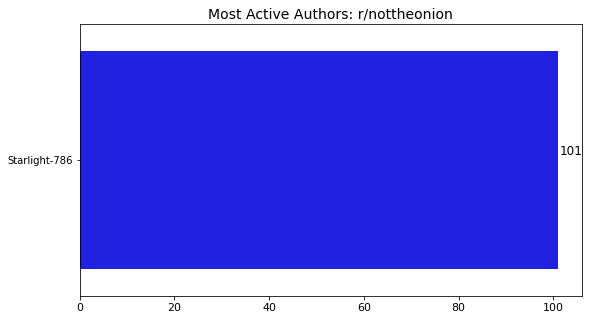

In [18]:
# Set x values: # of posts
not_onion_a = not_onion['author'].value_counts() 
not_onion_a = not_onion_a[not_onion_a > 100].sort_values(ascending=False)

# Set y values: Authors
not_onion_a_index = list(not_onion_a.index)

# Call function
bar_plot(not_onion_a.values, not_onion_a_index, 'Most Active Authors: r/nottheonion','b') 

Only one author has 100 post count

**r/TheOnion:** Most Referenced Domains

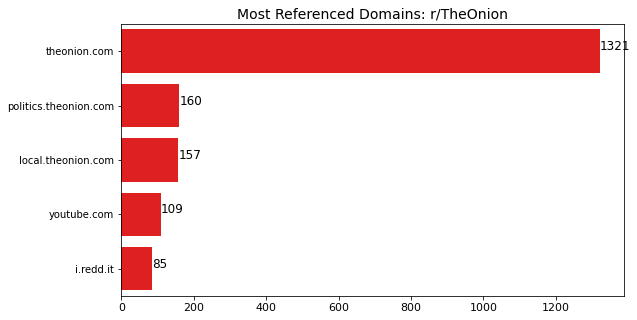

In [19]:
# Set x values: # of posts
onion_domain = onion['domain'].value_counts() 
onion_domain = onion_domain.sort_values(ascending=False).head(5)

# Set y values: Domains 
onion_domain_index = list(onion_domain.index)

# Call function
bar_plot(onion_domain.values, onion_domain_index, 'Most Referenced Domains: r/TheOnion','r') 

As we can see, the most referenced domains from r/TheOnion are TheOnion. 
This subreddit allows articles from other news websites therefore the results as shown.

**r/nottheonion:** Most Referenced Domains

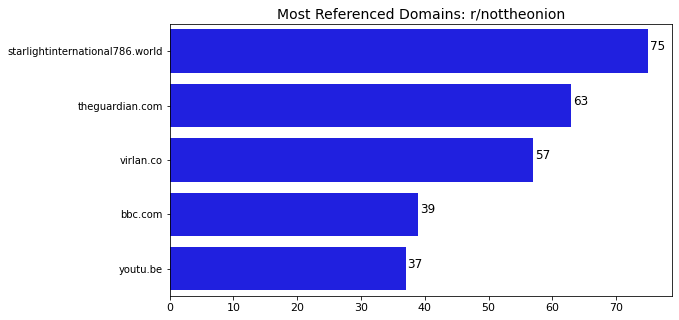

In [20]:
# Set x values: # posts that are greater than 100
notonion_domain = not_onion['domain'].value_counts() 
notonion_domain = notonion_domain.sort_values(ascending=False).head(5)

# Set y values: Names of authors 
notonion_domain_index = list(notonion_domain.index)

# Call function
bar_plot(notonion_domain.values, notonion_domain_index, 'Most Referenced Domains: r/nottheonion','b') 

Here starlightinternational786.world is the most referenced domain in r/nottheonion!

**Concatenate two DataFrames**

In [21]:
#Let's Combine both onion & not_onion to have only 'subreddit'  
combined_onion = pd.concat([onion[['subreddit', 'title']], not_onion[['subreddit', 'title']]], axis=0)

#Reset index
combined_onion = combined_onion.reset_index(drop=True)

In [22]:
#'TheOnion' first 10 preview
combined_onion.head(5)

,subreddit,title
0,TheOnion,Surgeon Kind Of Pissed Patient Seeing Her Defo...
1,TheOnion,McDonald’s blocked from building drive-through...
2,TheOnion,Gwyneth Paltrow Touts New Diamond-Encrusted Tr...
3,TheOnion,Artist Crafting Music Box Hopes It Delights At...
4,TheOnion,Homeowner Trying To Smoke Out Snakes Accidenta...


In [23]:
# show 'nottheonion' using tail
combined_onion.tail(5)

,subreddit,title
4239,nottheonion,"Stress, not fun, cited as a major reason to co..."
4240,nottheonion,Gov. Ron DeSantis (R-FL) quotes MLK while intr...
4241,nottheonion,Gov. Ron DeSantis quotes MLK while introducing...
4242,nottheonion,A scientist who taught rats how to play Doom I...
4243,nottheonion,"Italian antivax health worker who said ""i hope..."


In [24]:
# check concat dataframe
combined_onion.shape

(4244, 2)

In [25]:
combined_onion['title_len']=combined_onion['title'].apply(len)

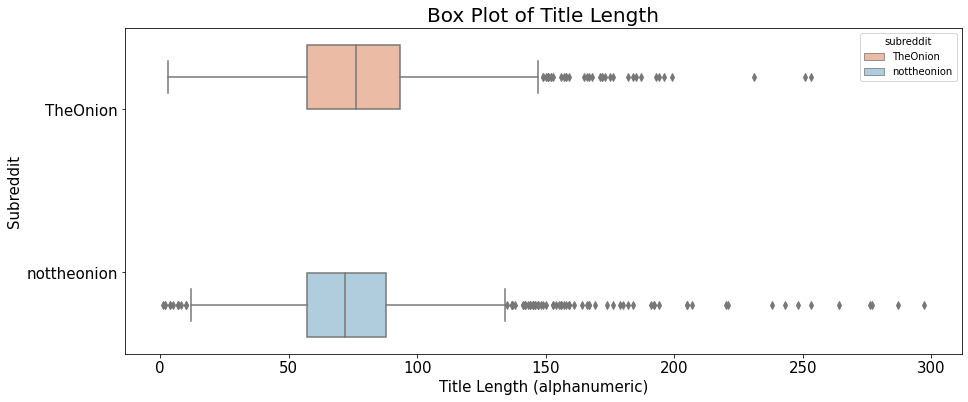

In [26]:
#normal boxplot
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(y= 'subreddit', 
                    x='title_len',
                    data=combined_onion, 
                    orient='h', 
                    hue='subreddit',
                    palette='RdBu')

ax.set_title('Box Plot of Title Length',fontsize=20)
ax.set_xlabel("Title Length (alphanumeric)",fontsize=15)
ax.set_ylabel("Subreddit",fontsize=15)
ax.tick_params(labelsize=15)

The distribution of the post length were both right-skewed. Title length for both subreddit are generally the same though r/nottheonion post has silghtly wider spread. However, there seem to have a few extreme outlier for subreddit TheOnion.

Let's Binarize Target as 'subreddit'

 -   TheOnion: 1
 -  nottheonion: 0


In [27]:
# Replace TheOnion with 1 and nottheonion with 0
combined_onion["subreddit"] = combined_onion["subreddit"].map({"nottheonion": 0, "TheOnion": 1})

In [28]:
# check shape
print(combined_onion.shape)

# head of 10
combined_onion.head(10)

(4244, 3)


,subreddit,title,title_len
0,1,Surgeon Kind Of Pissed Patient Seeing Her Defo...,109
1,1,McDonald’s blocked from building drive-through...,83
2,1,Gwyneth Paltrow Touts New Diamond-Encrusted Tr...,89
3,1,Artist Crafting Music Box Hopes It Delights At...,81
4,1,Homeowner Trying To Smoke Out Snakes Accidenta...,66
5,1,Dictionary.Com Names ‘Allyship’ 2021 Word Of T...,53
6,1,Man Realizes ‘The Texas Chain Saw Massacre’ Ac...,95
7,1,Idiotic New Year’s Resolutions You’ll Never Ac...,57
8,1,New Initiative Decreases Stigma Against Homele...,86
9,1,Italian Dentist Presents Fake Arm For Vaccinat...,61


In [29]:
# chekc tail which will show 0 nottheonion
combined_onion.tail(5)

,subreddit,title,title_len
4239,0,"Stress, not fun, cited as a major reason to co...",83
4240,0,Gov. Ron DeSantis (R-FL) quotes MLK while intr...,101
4241,0,Gov. Ron DeSantis quotes MLK while introducing...,94
4242,0,A scientist who taught rats how to play Doom I...,76
4243,0,"Italian antivax health worker who said ""i hope...",131


In [30]:
combined_onion['subreddit'].value_counts()

1    2324
0    1920
Name: subreddit, dtype: int64

In [31]:
# check shape
combined_onion.shape

(4244, 3)

# Pre-Processing

Text data or punctuation will be removed, lemmatizer use to help to shorten words. This helps to combine similar forms of the same word.

In [32]:
#make a cleaning function
def clean_data(dataframe):
    
     
    # Remove punctation
    dataframe['title'] = dataframe['title'].str.replace('[^\w\s]',' ')

    # Transform all text to lowercase
    dataframe['title'] = dataframe['title'].str.lower()
    
    # Remove numbers 
    dataframe['title'] = dataframe['title'].str.replace('[^A-Za-z]',' ')

    # Make sure any double-spaces are single 
    dataframe['title'] = dataframe['title'].str.replace('  ',' ')
    dataframe['title'] = dataframe['title'].str.replace('  ',' ')

    print(dataframe.shape)
    return dataframe.head()

In [33]:
# check cleaned data onion
clean_data(onion)

(2324, 8)


,Unnamed: 0,subreddit,author,domain,title,num_comments,score,timestamp
0,0,TheOnion,mothershipq,theonion.com,surgeon kind of pissed patient seeing her defo...,0,1,2021-12-31 17:55:00
1,1,TheOnion,-ImYourHuckleberry-,theartnewspaper.com,mcdonald s blocked from building drive through...,1,1,2021-12-31 17:29:31
2,2,TheOnion,dwaxe,theonion.com,gwyneth paltrow touts new diamond encrusted tr...,0,1,2021-12-31 13:01:11
3,3,TheOnion,dwaxe,theonion.com,artist crafting music box hopes it delights at...,0,1,2021-12-31 13:01:09
4,4,TheOnion,dwaxe,theonion.com,homeowner trying to smoke out snakes accidenta...,0,1,2021-12-31 13:01:08


In [34]:
# check cleaned data notonion
clean_data(not_onion)

(1920, 8)


,Unnamed: 0,subreddit,author,domain,title,num_comments,score,timestamp
0,0,nottheonion,Taco_duck68,wral.com,man attempts to pay for car with rap steals po...,0,1,2021-12-31 23:59:52
1,1,nottheonion,BlackNingaa,bloodyelbow.com,former ufc fighter reveals past as sex worker ...,1,1,2021-12-31 23:51:47
2,2,nottheonion,Lopsided_File_1642,facebook.com,log into facebook,1,1,2021-12-31 22:58:26
3,3,nottheonion,SkinnyWhiteGirl19,theartnewspaper.com,mcdonald s blocked from building drive through...,0,1,2021-12-31 22:40:29
4,4,nottheonion,kids-cake-and-crazy,kjrh.com,legendary actress betty white dies at on new y...,0,1,2021-12-31 22:19:41


In [35]:
def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]

In [36]:
combined_onion['tokens'] = combined_onion['title'].apply(lambda msg : tokenize(msg))
combined_onion.head()

,subreddit,title,title_len,tokens
0,1,Surgeon Kind Of Pissed Patient Seeing Her Defo...,109,"[surgeon, kind, of, pissed, patient, seeing, h..."
1,1,McDonald’s blocked from building drive-through...,83,"[mcdonald’s, blocked, from, building, drive-th..."
2,1,Gwyneth Paltrow Touts New Diamond-Encrusted Tr...,89,"[gwyneth, paltrow, touts, new, diamond-encrust..."
3,1,Artist Crafting Music Box Hopes It Delights At...,81,"[artist, crafting, music, box, hopes, it, deli..."
4,1,Homeowner Trying To Smoke Out Snakes Accidenta...,66,"[homeowner, trying, to, smoke, out, snakes, ac..."


In [37]:
# Remove tokens with length less than 3
def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

In [38]:
combined_onion['filtered_tokens'] = combined_onion['tokens'].apply(lambda x : remove_small_words(x))
combined_onion.head()

,subreddit,title,title_len,tokens,filtered_tokens
0,1,Surgeon Kind Of Pissed Patient Seeing Her Defo...,109,"[surgeon, kind, of, pissed, patient, seeing, h...","[surgeon, kind, pissed, patient, seeing, defor..."
1,1,McDonald’s blocked from building drive-through...,83,"[mcdonald’s, blocked, from, building, drive-th...","[mcdonald’s, blocked, from, building, drive-th..."
2,1,Gwyneth Paltrow Touts New Diamond-Encrusted Tr...,89,"[gwyneth, paltrow, touts, new, diamond-encrust...","[gwyneth, paltrow, touts, diamond-encrusted, t..."
3,1,Artist Crafting Music Box Hopes It Delights At...,81,"[artist, crafting, music, box, hopes, it, deli...","[artist, crafting, music, hopes, delights, lea..."
4,1,Homeowner Trying To Smoke Out Snakes Accidenta...,66,"[homeowner, trying, to, smoke, out, snakes, ac...","[homeowner, trying, smoke, snakes, accidentall..."


In [39]:
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]

In [40]:
combined_onion['clean_tokens'] = combined_onion['filtered_tokens'].apply(lambda x : remove_stopwords(x))
combined_onion.head()

,subreddit,title,title_len,tokens,filtered_tokens,clean_tokens
0,1,Surgeon Kind Of Pissed Patient Seeing Her Defo...,109,"[surgeon, kind, of, pissed, patient, seeing, h...","[surgeon, kind, pissed, patient, seeing, defor...","[surgeon, kind, pissed, patient, seeing, defor..."
1,1,McDonald’s blocked from building drive-through...,83,"[mcdonald’s, blocked, from, building, drive-th...","[mcdonald’s, blocked, from, building, drive-th...","[mcdonald’s, blocked, building, drive-through,..."
2,1,Gwyneth Paltrow Touts New Diamond-Encrusted Tr...,89,"[gwyneth, paltrow, touts, new, diamond-encrust...","[gwyneth, paltrow, touts, diamond-encrusted, t...","[gwyneth, paltrow, touts, diamond-encrusted, t..."
3,1,Artist Crafting Music Box Hopes It Delights At...,81,"[artist, crafting, music, box, hopes, it, deli...","[artist, crafting, music, hopes, delights, lea...","[artist, crafting, music, hopes, delights, lea..."
4,1,Homeowner Trying To Smoke Out Snakes Accidenta...,66,"[homeowner, trying, to, smoke, out, snakes, ac...","[homeowner, trying, smoke, snakes, accidentall...","[homeowner, trying, smoke, snakes, accidentall..."


In [41]:
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [42]:
combined_onion['lemma_words'] = combined_onion['clean_tokens'].apply(lambda x : lemmatize(x))
combined_onion.head()

,subreddit,title,title_len,tokens,filtered_tokens,clean_tokens,lemma_words
0,1,Surgeon Kind Of Pissed Patient Seeing Her Defo...,109,"[surgeon, kind, of, pissed, patient, seeing, h...","[surgeon, kind, pissed, patient, seeing, defor...","[surgeon, kind, pissed, patient, seeing, defor...","[surgeon, kind, pissed, patient, seeing, defor..."
1,1,McDonald’s blocked from building drive-through...,83,"[mcdonald’s, blocked, from, building, drive-th...","[mcdonald’s, blocked, from, building, drive-th...","[mcdonald’s, blocked, building, drive-through,...","[mcdonald’s, blocked, building, drive-through,..."
2,1,Gwyneth Paltrow Touts New Diamond-Encrusted Tr...,89,"[gwyneth, paltrow, touts, new, diamond-encrust...","[gwyneth, paltrow, touts, diamond-encrusted, t...","[gwyneth, paltrow, touts, diamond-encrusted, t...","[gwyneth, paltrow, tout, diamond-encrusted, tr..."
3,1,Artist Crafting Music Box Hopes It Delights At...,81,"[artist, crafting, music, box, hopes, it, deli...","[artist, crafting, music, hopes, delights, lea...","[artist, crafting, music, hopes, delights, lea...","[artist, crafting, music, hope, delight, least..."
4,1,Homeowner Trying To Smoke Out Snakes Accidenta...,66,"[homeowner, trying, to, smoke, out, snakes, ac...","[homeowner, trying, smoke, snakes, accidentall...","[homeowner, trying, smoke, snakes, accidentall...","[homeowner, trying, smoke, snake, accidentally..."


In [43]:
def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [44]:
combined_onion['clean_text'] = combined_onion['lemma_words'].apply(lambda x : return_sentences(x))
combined_onion.head()

,subreddit,title,title_len,tokens,filtered_tokens,clean_tokens,lemma_words,clean_text
0,1,Surgeon Kind Of Pissed Patient Seeing Her Defo...,109,"[surgeon, kind, of, pissed, patient, seeing, h...","[surgeon, kind, pissed, patient, seeing, defor...","[surgeon, kind, pissed, patient, seeing, defor...","[surgeon, kind, pissed, patient, seeing, defor...",surgeon kind pissed patient seeing deformed fa...
1,1,McDonald’s blocked from building drive-through...,83,"[mcdonald’s, blocked, from, building, drive-th...","[mcdonald’s, blocked, from, building, drive-th...","[mcdonald’s, blocked, building, drive-through,...","[mcdonald’s, blocked, building, drive-through,...",mcdonald’s blocked building drive-through rome...
2,1,Gwyneth Paltrow Touts New Diamond-Encrusted Tr...,89,"[gwyneth, paltrow, touts, new, diamond-encrust...","[gwyneth, paltrow, touts, diamond-encrusted, t...","[gwyneth, paltrow, touts, diamond-encrusted, t...","[gwyneth, paltrow, tout, diamond-encrusted, tr...",gwyneth paltrow tout diamond-encrusted trepana...
3,1,Artist Crafting Music Box Hopes It Delights At...,81,"[artist, crafting, music, box, hopes, it, deli...","[artist, crafting, music, hopes, delights, lea...","[artist, crafting, music, hopes, delights, lea...","[artist, crafting, music, hope, delight, least...",artist crafting music hope delight least child...
4,1,Homeowner Trying To Smoke Out Snakes Accidenta...,66,"[homeowner, trying, to, smoke, out, snakes, ac...","[homeowner, trying, smoke, snakes, accidentall...","[homeowner, trying, smoke, snakes, accidentall...","[homeowner, trying, smoke, snake, accidentally...",homeowner trying smoke snake accidentally burn...


# Natural Language Processing (NLP)

This part Count Vectorizer is used and explore the most used words,also the combinations of words from each subreddit

**Apply CountVectorizer()**
- **ngram_range = (1,1)** 
- **TheOnion** subreddit is 1

In [45]:
#ngram_range = (1,1)
#set TheOnion Titles as variable
mask_onion = combined_onion['subreddit'] == 1
onion_titles = combined_onion[mask_onion]['title']

# Instantiate the CountVectorizer
cv1 = CountVectorizer(stop_words = 'english')

In [46]:
# Fit and transform 
onion_cv1 = cv1.fit_transform(onion_titles)

# Convert onion_cv1 to DataFrame
onion_cv1_df = pd.DataFrame(onion_cv1.toarray(),
                   columns=cv1.get_feature_names())

# check shape
print(onion_cv1_df.shape)

(2324, 7541)


- **ngram_range = (1,1)**
- **nottheonion** subreddit is 0

In [47]:
#setup mask
mask_onion = combined_onion['subreddit'] == 0
notonion_titles = combined_onion[mask_onion]['title']

# Instantiate the CountVectorizer
cv0 = CountVectorizer(stop_words = 'english')

# Fit and transform the vectorizer 
onion_cv0 = cv0.fit_transform(notonion_titles)

# Convert onion_cv1 to DataFrame
onion_cv0_df = pd.DataFrame(onion_cv0.toarray(),
                   columns=cv0.get_feature_names())

# check shape
print(onion_cv0_df.shape)

(1920, 5820)


**r/TheOnion:** Top 5 Unigrams

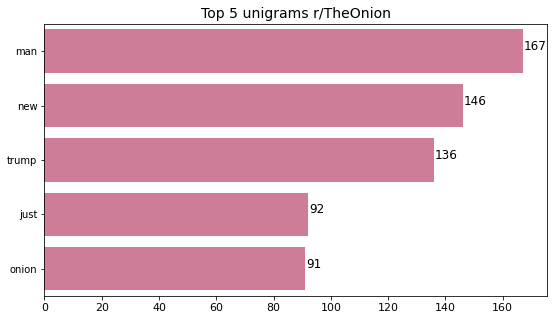

In [54]:
# variable for top 10 most used words in Onion
onion_wc = onion_cv1_df.sum(axis = 0)
onion_top = onion_wc.sort_values(ascending=False).head(5)

# Calling function
bar_plot(onion_top.values, onion_top.index, 'Top 5 unigrams r/TheOnion','palevioletred') 


**r/nottheonion:** Top 5 Unigrams

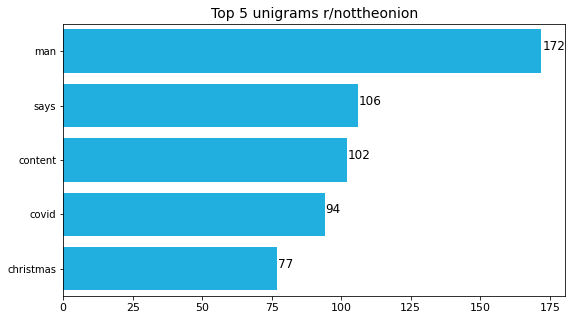

In [55]:
#variables to top 5 most used words in Onion
notonion_wc = onion_cv0_df.sum(axis = 0)
notonion_top = notonion_wc.sort_values(ascending=False).head(5)

# Call function
bar_plot(notonion_top.values, notonion_top.index, 'Top 5 unigrams r/nottheonion','deepskyblue') 

In [56]:
#compare common word of both subreddit
# Create list of unique words
not_onion_set_10 = set(notonion_top10.index)
onion_set10 = set(onion_top10.index)

In [57]:
# use intersection
common_unigrams = onion_set10.intersection(not_onion_set_10)
common_unigrams

{'man'}

**Apply CountVectorizer() Bigram**
- **ngram_range = (2,2)** 
- **TheOnion** subreddit is 1

In [52]:
mask_onion = combined_onion['subreddit'] == 1
onion_titles = combined_onion[mask_onion]['title']

# Instantiate cv
cv1_2 = CountVectorizer(stop_words = 'english', ngram_range=(2,2))

# Fit and transform corpus
onion_cv1_2 = cv1_2.fit_transform(onion_titles)

# Convert into a DataFrame
onion_cv1_2_df = pd.DataFrame(onion_cv1_2.toarray(),
                   columns=cv1_2.get_feature_names())

# shape
print(onion_cv1_2_df.shape)

(2324, 15783)


- **ngram_range = (2,2)** 
- **nottheonion** subreddit is 0


In [58]:
mask_onion = combined_onion['subreddit'] == 0
notonion_titles = combined_onion[mask_onion]['title']

# Instantiate the CountVectorizer
cv0_2 = CountVectorizer(stop_words = 'english', ngram_range=(2,2))

# Fit and transform the vectorizer 
onion_cv0_2 = cv0_2.fit_transform(notonion_titles)

# Convert onion_cv1 to DataFrame
onion_cv0_2_df = pd.DataFrame(onion_cv0_2.toarray(),
                   columns=cv0_2.get_feature_names())

# check shape
print(onion_cv0_2_df.shape)

(1920, 11476)


**r/TheOnion:** Top 5 Bigrams

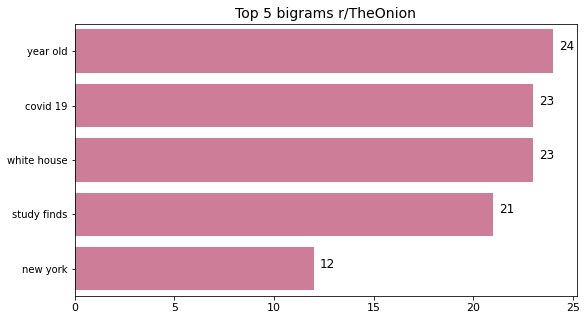

In [59]:
# Set up variables to contain top 5 most used bigrams in r/TheOnion
onion_wc = onion_cv1_2_df.sum(axis = 0)
onion_top_5 = onion_wc.sort_values(ascending=False).head(5)

# Call function
bar_plot(onion_top_5.values, onion_top_5.index, 'Top 5 bigrams r/TheOnion','palevioletred') 

**r/nottheonion:** Top 5 Bigrams

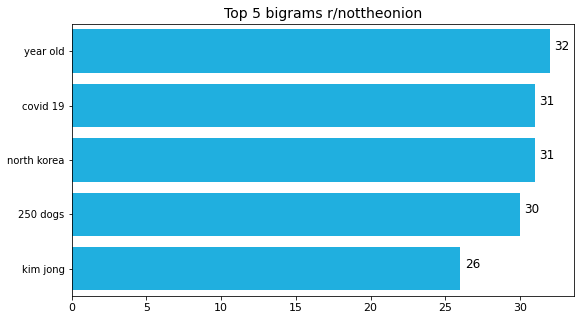

In [60]:
# Set up variables to contain top 5 most used bigrams in r/nottheonion
nonion_wc = onion_cv0_2_df.sum(axis = 0)
nonion_top_5 = nonion_wc.sort_values(ascending=False).head(5)

# Call function
bar_plot(nonion_top_5.values, nonion_top_5.index, 'Top 5 bigrams r/nottheonion','deepskyblue') 

In [61]:
not_onion_5_list = set(nonion_top_5.index)
onion_5_list = set(onion_top_5.index)

# Return common words
common_bigrams = onion_5_list.intersection(not_onion_5_list)
common_bigrams

{'covid 19', 'year old'}

Take out {'man', 'new', 'old', 'people', 'say', 'trump', 'woman', 'year'} from dataset when modeling, since these words occur frequently in both subreddits.

- **ngram_range = (3,3)** 
- **nottheonion** subreddit is 1

In [63]:
mask_onion = combined_onion['subreddit'] == 1
onion_titles = combined_onion[mask_onion]['title']

# Instantiate cv
cv1_3 = CountVectorizer(stop_words = 'english', ngram_range=(3,3))

# Fit and transform corpus
onion_cv1_3 = cv1_3.fit_transform(onion_titles)

# Convert into a DataFrame
onion_cv1_3_df = pd.DataFrame(onion_cv1_3.toarray(),
                   columns=cv1_3.get_feature_names())

# shape
print(onion_cv1_3_df.shape)

(2324, 14335)


- **ngram_range = (3,3)** 
- **nottheonion** subreddit is 0

In [64]:
mask_onion = combined_onion['subreddit'] == 0
notonion_titles = combined_onion[mask_onion]['title']

# Instantiate the CountVectorizer
cv0_3 = CountVectorizer(stop_words = 'english', ngram_range=(3,3))

# Fit and transform the vectorizer 
onion_cv0_3 = cv0_3.fit_transform(notonion_titles)

# Convert onion_cv1 to DataFrame
onion_cv0_3_df = pd.DataFrame(onion_cv0_3.toarray(),
                   columns=cv0_3.get_feature_names())

# check shape
print(onion_cv0_3_df.shape)

(1920, 10918)


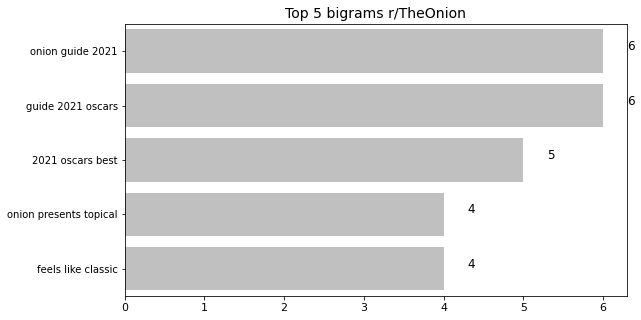

In [65]:
# Set up variables to contain top 5 most used bigrams in r/TheOnion
onion_wc = onion_cv1_3_df.sum(axis = 0)
onion_top_5 = onion_wc.sort_values(ascending=False).head(5)

# Call function
bar_plot(onion_top_5.values, onion_top_5.index, 'Top 5 bigrams r/TheOnion','silver') 

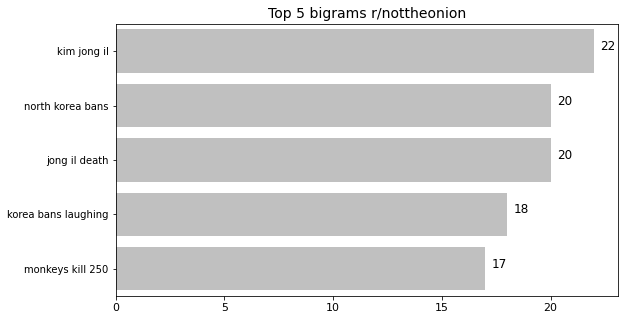

In [66]:
# Set up variables to contain top 5 most used bigrams in r/nottheonion
nonion_wc = onion_cv0_3_df.sum(axis = 0)
nonion_top_5 = nonion_wc.sort_values(ascending=False).head(5)

# Call function
bar_plot(nonion_top_5.values, nonion_top_5.index, 'Top 5 bigrams r/nottheonion','silver') 

In [67]:
not_onion_5_list = set(nonion_top_5.index)
onion_5_list = set(onion_top_5.index)

# Return common words
common_trigrams = onion_5_list.intersection(not_onion_5_list)
common_trigrams

set()

Save Cleaned DataFrame as csv file

In [62]:
combined_onion.to_csv('./c_onion.csv', index = False)

As title feature is in natural language, checking for outlier and/or distribution is Not Applicable.